In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

from feature_engine.outliers import Winsorizer

In [5]:
data = pd.read_csv('BostonHousing.csv',usecols=['rm','lstat','crim','medv'])
data.head()

,crim,rm,lstat,medv
0,0.00632,6.575,4.98,24.0
1,0.02731,6.421,9.14,21.6
2,0.02729,7.185,4.03,34.7
3,0.03237,6.998,2.94,33.4
4,0.06905,7.147,5.33,36.2


In [13]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

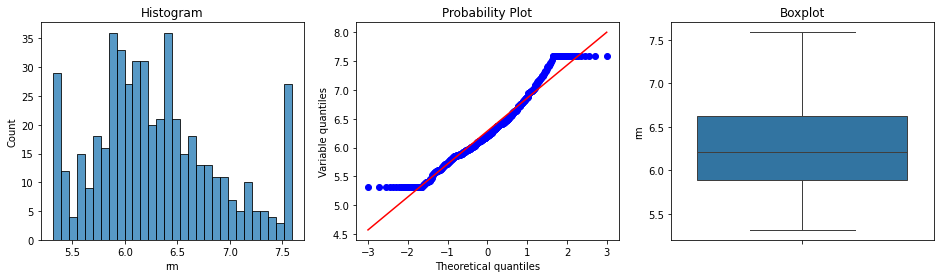

In [14]:
# let's find outliers in RM

diagnostic_plots(data, 'rm')

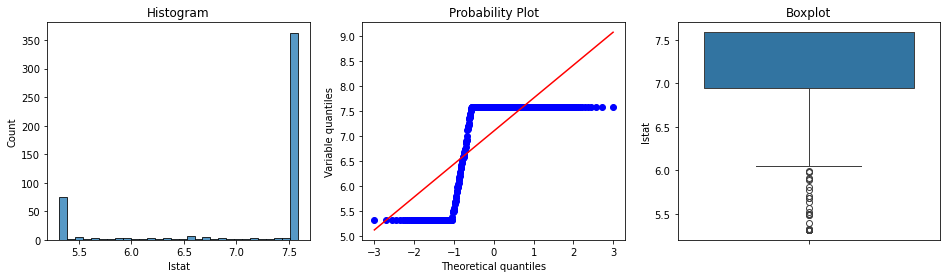

In [15]:
# visualise outliers in LSTAT

diagnostic_plots(data, 'lstat')


In [16]:
def find_normal_boundaries(df, variable, distance):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + distance * df[variable].std()
    lower_boundary = df[variable].mean() - distance * df[variable].std()

    return upper_boundary, lower_boundary

In [17]:


# find limits for RM

RM_upper_limit, RM_lower_limit = find_normal_boundaries(data, 'rm', 3)
RM_upper_limit, RM_lower_limit



(8.028758531195738, 4.542929215839833)

In [18]:
# limits for LSTAT

LSTAT_upper_limit, LSTAT_lower_limit = find_normal_boundaries(data, 'lstat', 3)
LSTAT_upper_limit, LSTAT_lower_limit

(9.692562065543394, 4.509343072796529)

In [19]:
# Now let's replace the outliers by the maximum and minimum limit

data['rm']= np.where(data['rm'] > RM_upper_limit, RM_upper_limit,
                       np.where(data['rm'] < RM_lower_limit, RM_lower_limit, data['rm']))


In [20]:
# Now let's replace the outliers by the maximum and minimum limit

data['lstat']= np.where(data['lstat'] > RM_upper_limit, RM_upper_limit,
                       np.where(data['lstat'] < RM_lower_limit, RM_lower_limit, data['lstat']))


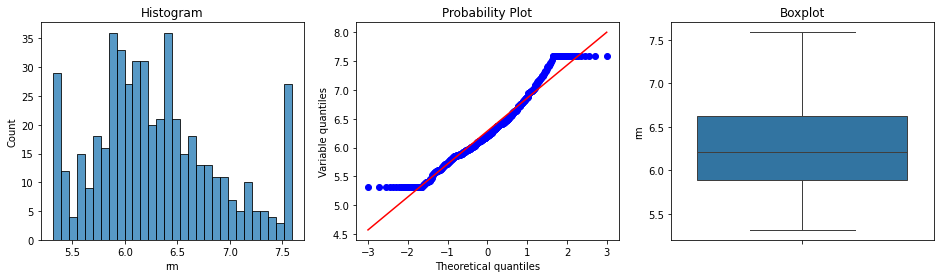

In [21]:
# let's explore outliers in the trimmed dataset
# for RM we see much less outliers as in the original dataset

diagnostic_plots(data, 'rm')


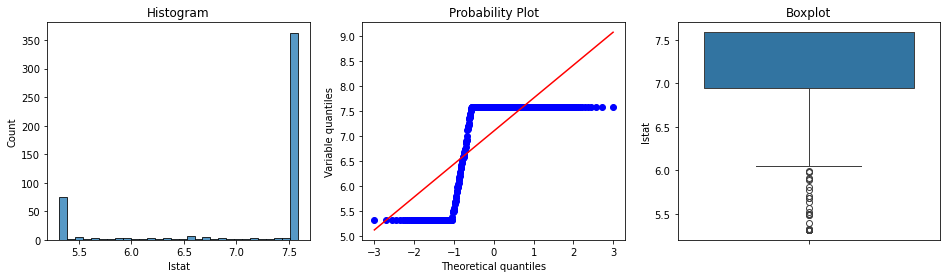

In [22]:
diagnostic_plots(data, 'lstat')